# Knowledge

📚 Represent personal Knowledge as a graph, with nodes for articles and edges for connections between them. The connections are computed based on the number of tags in commun. This should serve as a way to discover visually new content, and browse through existing content.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('diigo/diigo_csv_2024_11_09.csv')
df.head()

,title,url,tags,description,comments,annotations,created_at
0,Raindrop.io — All-in-one bookmark manager,https://raindrop.io,"bookmark,knowledge,diigo",NaN,NaN,NaN,2024-11-09 20:01:45
1,Overcoming the Limitations of Large Language M...,https://towardsdatascience.com/overcoming-the-...,"llm,nlp,AI",NaN,NaN,NaN,2023-01-29 17:38:18
2,Document AI | Processing of DocLayNet dataset ...,https://medium.com/@pierre_guillou/document-ai...,"AI,nlp",NaN,NaN,NaN,2023-01-29 17:36:53
3,How to Voxelize Meshes and Point Clouds in Pyt...,https://towardsdatascience.com/how-to-voxelize...,"python,3D",NaN,NaN,NaN,2022-06-01 08:12:24
4,Build a Mobile Application With the Kivy Pytho...,https://realpython.com/mobile-app-kivy-python/,"python,application,mobile",NaN,NaN,NaN,2022-05-29 16:57:03


In [5]:
# count how many NaN in tags
df.tags.isna().sum()

np.int64(28)

In [6]:
df.tags.fillna('')

0                             bookmark,knowledge,diigo
1                                           llm,nlp,AI
2                                               AI,nlp
3                                            python,3D
4                            python,application,mobile
                             ...                      
3070                       "embedded system",wikipedia
3071    "embedded system",automotive,wikipedia,windows
3072                       wikipedia,"embedded system"
3073                                             Tools
3074                           bookmarking,diigo,tools
Name: tags, Length: 3075, dtype: object

In [7]:
n = len(df)
n

3075

In [8]:
df = df.drop(['description', 'comments', 'annotations'], axis=1)
df

,title,url,tags,created_at
0,Raindrop.io — All-in-one bookmark manager,https://raindrop.io,"bookmark,knowledge,diigo",2024-11-09 20:01:45
1,Overcoming the Limitations of Large Language M...,https://towardsdatascience.com/overcoming-the-...,"llm,nlp,AI",2023-01-29 17:38:18
2,Document AI | Processing of DocLayNet dataset ...,https://medium.com/@pierre_guillou/document-ai...,"AI,nlp",2023-01-29 17:36:53
3,How to Voxelize Meshes and Point Clouds in Pyt...,https://towardsdatascience.com/how-to-voxelize...,"python,3D",2022-06-01 08:12:24
4,Build a Mobile Application With the Kivy Pytho...,https://realpython.com/mobile-app-kivy-python/,"python,application,mobile",2022-05-29 16:57:03
...,...,...,...,...
3070,"Embedded system - Wikipedia, the free encyclop...",http://en.wikipedia.org/wiki/Embedded_system,"""embedded system"",wikipedia",2012-11-17 16:28:24
3071,Windows Embedded Automotive – Wikipedia,http://de.wikipedia.org/wiki/Windows_Automotive,"""embedded system"",automotive,wikipedia,windows",2012-11-17 16:27:02
3072,Eingebettetes System – Wikipedia,http://de.wikipedia.org/wiki/Eingebettetes_System,"wikipedia,""embedded system""",2012-11-17 15:59:52
3073,Basecamp's exclusive single-page projects keep...,http://basecamp.com/one-page-project,Tools,2012-11-16 17:07:44


In [9]:
df.to_csv('diigo/diigo_csv_2024_11_09_lite.csv',index=None)

## Tagslist

In [10]:
list0 = ["," for i in range(len(df))]
# df0 = pd.DataFrame(list0)

In [11]:
s0 = pd.Series(list0)

In [12]:
s = df.tags.fillna('') + s0
tagsum = s.sum()

In [13]:
tagslist = tagsum.split(",")
tagslist = list(dict.fromkeys(tagslist))
tagslist.remove('')
p = len(tagslist)
p

720

In [14]:
tagslist[0:10]

['bookmark',
 'knowledge',
 'diigo',
 'llm',
 'nlp',
 'AI',
 'python',
 '3D',
 'application',
 'mobile']

### Handle multiple tags for one article

In [23]:
df['tags'][6]

'plotly'

In [24]:
tagslist.index(df['tags'][6])

11

In [25]:
l = df['tags'][4].split(",")
l

['python', 'application', 'mobile']

In [26]:
l = df['tags'][2].split(",")
l

['AI', 'nlp']

In [27]:
for i in l:
    print(tagslist.index(i))

5
4


In [28]:
df['tags'][2].split(",")[0]

'AI'

### Handle no tag for one article

In [30]:
i = 667
# handle cases with no tag (nan)
df['tags'][i]

nan

In [31]:
pd.isna(df['tags'][i])

True

In [32]:
from math import isnan
isnan(df['tags'][i])

True

In [33]:
df['tags'][[i]].isnull().sum()

np.int64(1)

In [34]:
df['tags'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
3070    False
3071    False
3072    False
3073    False
3074    False
Name: tags, Length: 3075, dtype: bool

In [35]:
~pd.isna(df['tags'][i])

-2

## Adjacency matrix linking articles and tags



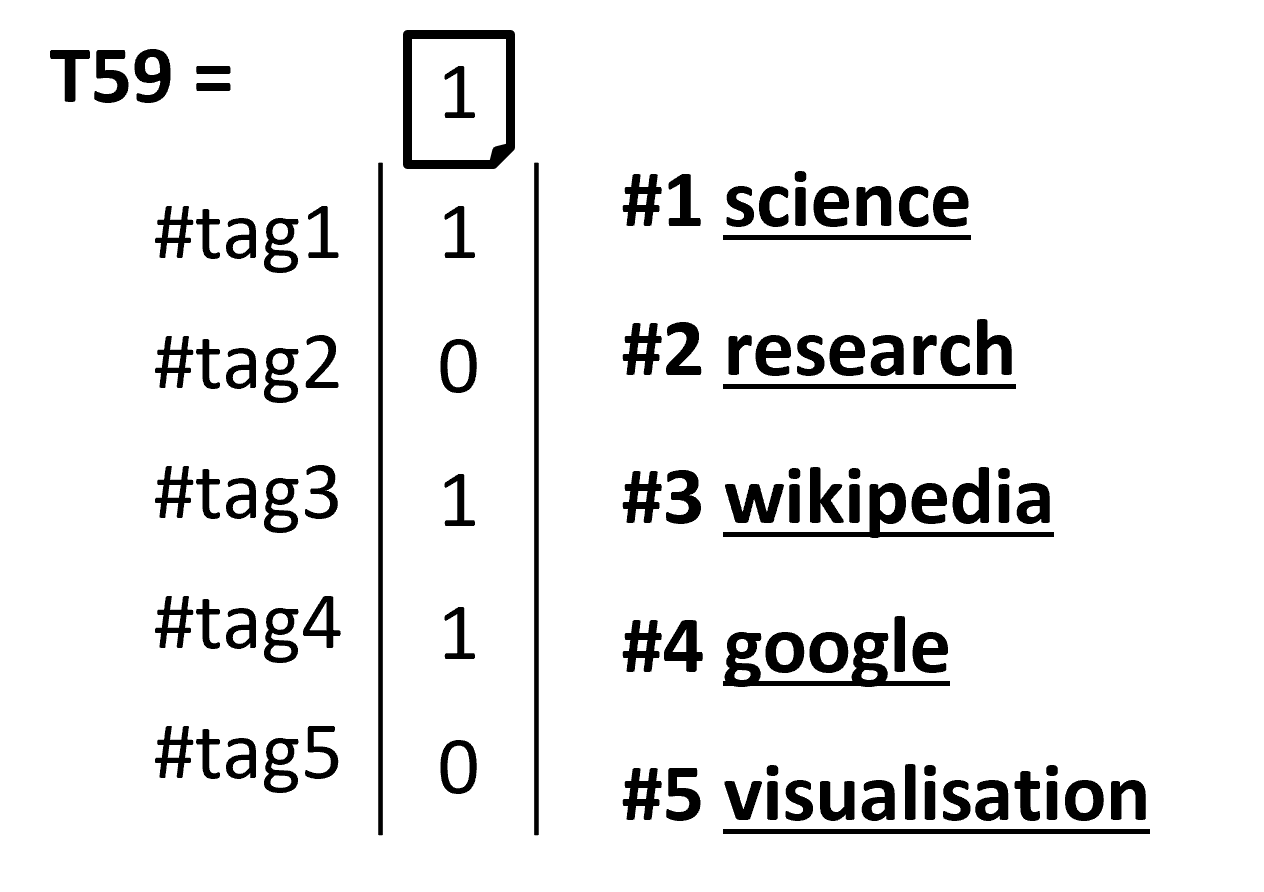

In [27]:
from IPython.display import Image 
Image(filename='img/file_1_vector.png',width=300)

In [36]:
# Create a vector of n tags appearing in the set of articles
# Incrementing in parallel the matrix T joining the articles (rows) with the corresponding tags(columns)

import numpy as np

T = np.zeros((n,p))

for index, row in df.iterrows():
    # iterate on the dataframe of articles 
    if not pd.isna(row['tags']):
        l = row['tags'].split(",")
        for i in l:
            j = tagslist.index(i)
            T[index,j] = 1

In [37]:
T[1,0] # article on "Topic Modeling" with tag "data science"

np.float64(0.0)

In [38]:
w = np.where(T[1]==1)
v = w[0]
v # array of positions of 1s in the vector T[1]

array([3, 4, 5])

In [40]:
np.where(T[2]==1)

(array([4, 5]),)

In [41]:
np.where(T[3]==1)

(array([6, 7]),)

In [42]:
v = np.where(T==1)
v1 = v[0]
v2 = v[1]
v1,v2

(array([   0,    0,    0, ..., 3074, 3074, 3074]),
 array([  0,   1,   2, ...,   2, 181, 275]))

https://www.w3schools.com/python/numpy_array_search.asp

In [43]:
T2 = np.transpose(T)

In [44]:
# Computation of the matrix Z which contains 
# on the diagonale the number of appearance di of each tag i
# on the other elements the degree d(i,j) of closeness of 2 tags (i,j)
# this matrix is symmetrical

Z = np.matmul(T2,T)

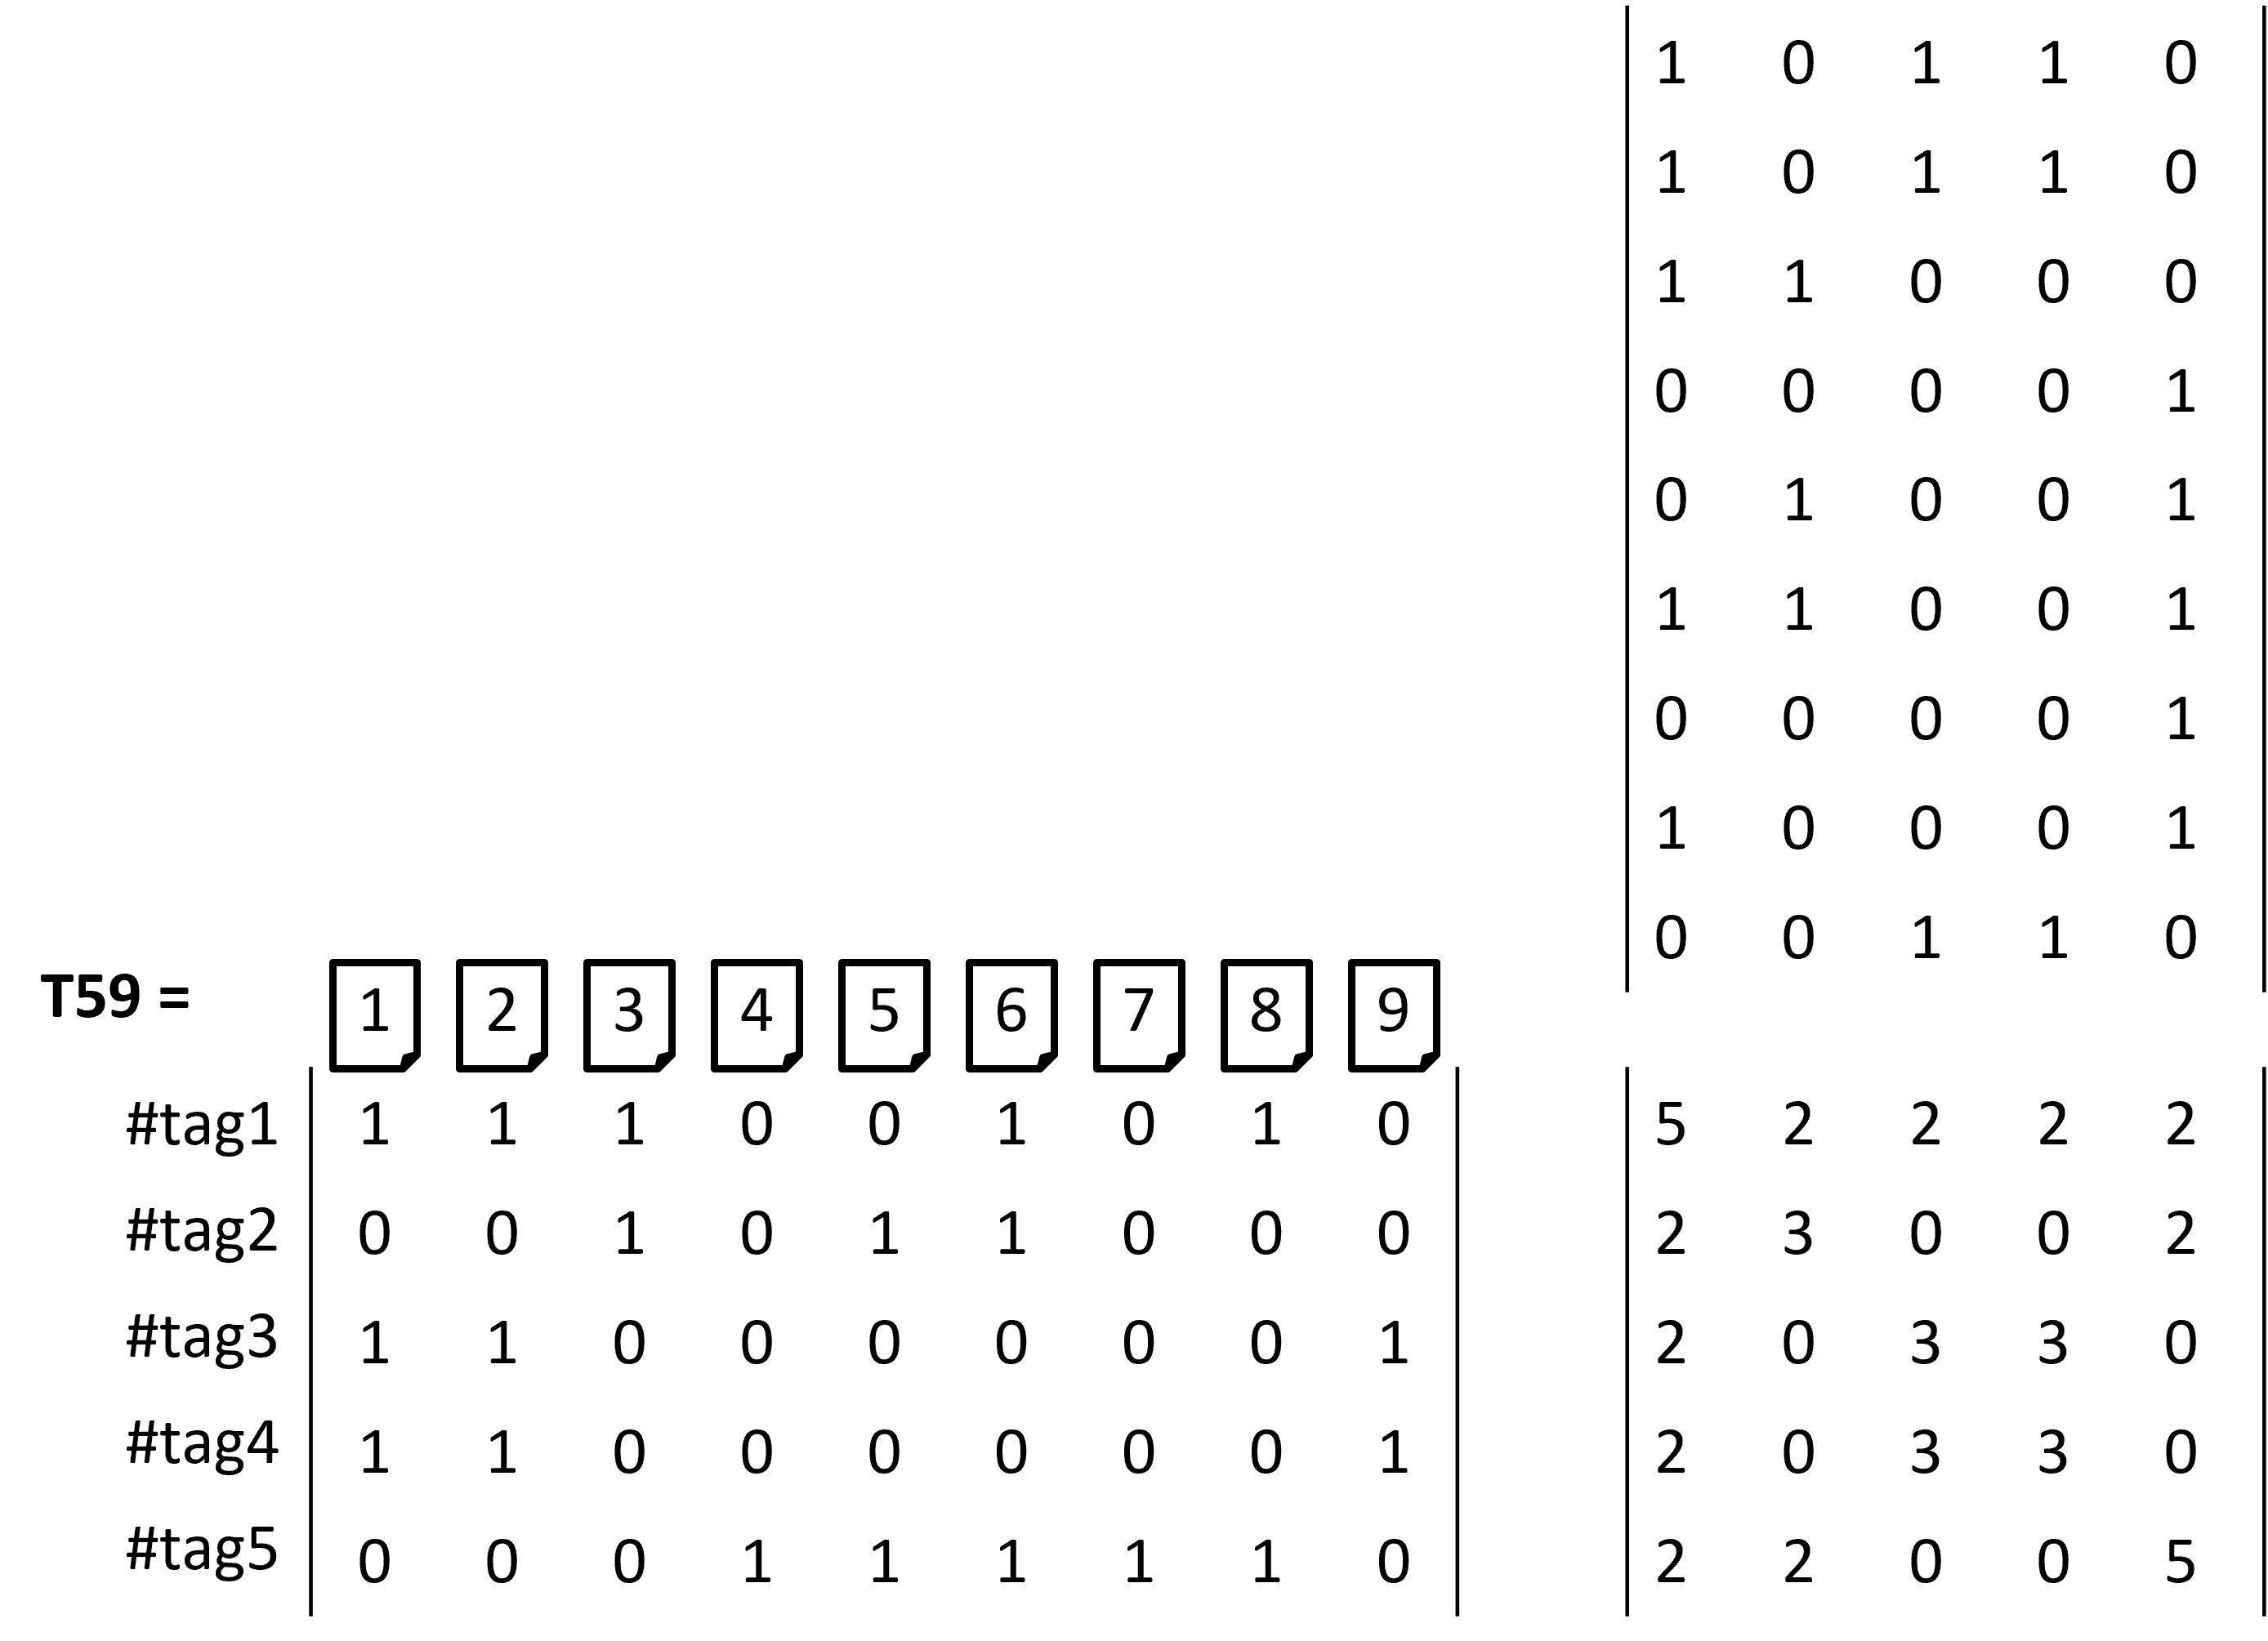

In [45]:
from IPython.display import Image 
Image(filename='img/adjacency_matrix_building.png')

In [46]:
Zdiag=[]
for i in range(len(Z)):
    Zdiag.append(Z[i,i])

## Sort the 100 most used tags

In [47]:
# pd.Series(tagslist)
tags = pd.DataFrame(tagslist, columns=["tag"])
tags["r"]=Zdiag
tags.head()

,tag,r
0,bookmark,1.0
1,knowledge,17.0
2,diigo,21.0
3,llm,1.0
4,nlp,10.0


In [48]:
# zdiag = pd.DataFrame(Zdiag,columns = ["r"])

In [49]:
# Zdiag.sort(reverse=True)
# Zdiag

In [50]:
# Sorting by descending value of r, and selecting the 100 first tags
tags100 = tags.sort_values("r",ascending = False)[0:100]
tags100

,tag,r
137,software,282.0
21,"""usine nouvelle""",189.0
6,python,188.0
189,wikipedia,168.0
191,scilab,136.0
...,...,...
604,Electronica,19.0
376,job,19.0
223,aerospace,19.0
23,streamlit,19.0


## Edges list

In [51]:
E = []
# Iterate on the upper triangle matrix above the diag of Z
for i in range(len(Z)):
    for j in range(i+1,len(Z)):
        if Z[i,j] !=0:
            E.append([i,j])

In [52]:
edges = pd.DataFrame(E, columns=["source","target"])
edges

,source,target
0,0,1
1,0,2
2,1,2
3,1,15
4,1,17
...,...,...
4109,711,713
4110,712,713
4111,712,714
4112,713,714


## Nodes list

In [53]:
nodes = pd.DataFrame(tagslist, columns=["tag"])
nodes["r"]=Zdiag
nodes

,tag,r
0,bookmark,1.0
1,knowledge,17.0
2,diigo,21.0
3,llm,1.0
4,nlp,10.0
...,...,...
715,product,3.0
716,international,5.0
717,bitkom,2.0
718,Unternehmen,1.0


In [54]:
nodes.to_csv('diigo/nodes_diigo.csv')
edges.to_csv('diigo/edges_diigo.csv')

## Import Nodes and Edges

If starting from existing saved files

In [2]:
import pandas as pd
nodes = pd.read_csv('diigo/nodes_diigo.csv',index_col="Unnamed: 0")
nodes

,tag,r
0,python,138.0
1,map,6.0
2,visualization,51.0
3,minecraft,9.0
4,"""video game""",17.0
...,...,...
704,product,3.0
705,international,5.0
706,bitkom,2.0
707,Unternehmen,1.0


In [3]:
# Filter out the tags that are only used once
nodes[nodes['r'] == 1]

,tag,r
9,development,1.0
32,mlops,1.0
34,powerBI,1.0
36,kubernetes,1.0
40,recommender,1.0
41,neo4j,1.0
45,r,1.0
52,pycaret,1.0
55,json,1.0
63,pytorch,1.0


In [4]:
nodes2 = nodes[nodes['r'] > 1]
nodes2

,tag,r
0,python,138.0
1,map,6.0
2,visualization,51.0
3,minecraft,9.0
4,"""video game""",17.0
...,...,...
703,european,6.0
704,product,3.0
705,international,5.0
706,bitkom,2.0


In [5]:
edges = pd.read_csv('Diigo/edges_diigo.csv',index_col="Unnamed: 0")
edges

,source,target
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5
...,...,...
4038,700,702
4039,701,702
4040,701,703
4041,702,703


In [6]:
edges[edges.source == 17]

,source,target
403,17,18
404,17,19
405,17,20
406,17,24
407,17,27
...,...,...
512,17,559
513,17,571
514,17,670
515,17,671


In [7]:
nodes.iloc[18]

tag    "open source"
r              128.0
Name: 18, dtype: object

## Top 10 graph

In [8]:
nodes = pd.read_csv('diigo/nodes_diigo_top10.csv')
edges = pd.read_csv('diigo/edges_diigo_top10.csv')

## Graph building

In [9]:
import networkx as nx
G = nx.Graph()

In [10]:
for index, row in nodes.iterrows():
    # print(row['tag'],row['r'])
    # G.add_node(row['id'])
    G.add_node(index)

In [11]:
G.number_of_nodes()

10

In [12]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

In [13]:
type(edges['source'][0])

numpy.int64

In [14]:
# By default, source and target are numpy.int64
# Translated to int for further JSON serialization
for index, row in edges.iterrows():
    # print(row['source'],row['target'])
    G.add_edge(int(row['source']),int(row['target']))

In [15]:
# Check that we have not added nodes in the process of adding edges
G.number_of_nodes()

10

## D3 Force-directed graph
https://observablehq.com/@d3/force-directed-graph

In [16]:
import json
import flask
# import networkx as nx
from networkx.readwrite import json_graph

In [17]:
# nodes.loc[[0]].tag
nodes.tag[0]

'software'

In [18]:
# this d3 example uses the name attribute for the mouse-hover value,
# so add a name to each node
for n in G:
    # nodes id start at 0
    G.nodes[n]["name"] = nodes.tag[n]
    # G.nodes[n]["name"] = nodes.tag[n-1]
    # G.nodes[n]["name"] = n
    # print(nodes.tag[n])
    # print(n)

In [19]:
G.nodes[0]["name"]

'software'

In [20]:
# G.nodes.data()

In [21]:
# write json formatted data
d = json_graph.node_link_data(G)  # node-link format to serialize
# d

In [22]:
# d.get('nodes')
# d['nodes']

In [23]:
# type(d['nodes'][0]['id'])
type(d['links'][0]['target'])

int

Pay attention when building JSON:

*TypeError: Object of type int64 is not JSON serializable*

In [24]:
# write json
json.dump(d, open("force/force.json", "w"))
print("Wrote node-link JSON data to force/force.json")

Wrote node-link JSON data to force/force.json


In [25]:
# Serve the file over http to allow for cross origin requests
app = flask.Flask(__name__, static_folder="force")


@app.route("/")
def static_proxy():
    return app.send_static_file("force.html")


print("\nGo to http://localhost:8000 to see the example\n")
app.run(port=8000)


Go to http://localhost:8000 to see the example

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8000/ (Press CTRL+C to quit)
127.0.0.1 - - [05/Dec/2021 23:07:10] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [05/Dec/2021 23:07:10] "GET /force/force.css HTTP/1.1" 200 -
127.0.0.1 - - [05/Dec/2021 23:07:11] "GET /force/force.js HTTP/1.1" 200 -
127.0.0.1 - - [05/Dec/2021 23:07:11] "GET /force/force.json HTTP/1.1" 200 -


## Simple representation

Requires PIL and matplotlib

In [ ]:
nx.draw(G, with_labels=True, font_weight='bold')